# 알고리즘 algorithm

## 가. 학습내용

### 1) 목표

* 문제를 푸는 체계적인 방법으로, 시작과 끝이 있고, 명령문으로 구성된다.
* 좋은 알고리즘은 1) 명령문이 최소한으로 수행될 수 있고, 2) 저장공간을 효율적으로 사용하도록 만들어져야 한다.
    * profiling을 통해 (파이썬 함수 timeit를 이용), 수행시간을 측정할 수 있다.

### 2) 문제

* 알고리즘-1: 배열에서 최대/최소 값 찾기
    * min/max
    * 2nd min/max
* 알고리즘-2: linear search
    * sentinel search
* 알고리즘-3: binary search
* 알고리즘-4: selection sort
* 알고리즘-5: insertion sort
* 알고리즘-6: bubble sort
* 알고리즘-7: sine, cos
* 알고리즘-8: sierpinski
* 알고리즘-9: algorithmic 삼각형
* 거북이 도형복사
* 거북이 도형이동
* 거북이 도형미러링
* fitting
* 그래프 그리기
* 그린 도형을 다시 불러서 그리기

* merge sort -> no
* factorial -> no

### 3) 과제

* 무작위로 1~1000 사이의 수를 100개 정도 생성하고, 빠른 정렬 알고리듬 개발

In [2]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [3]:
%load_ext plantuml_magics

In [4]:
import glob
glob.glob(r'./*.jar')

['./plantuml.jar']

In [4]:
# 아래 결과가 /usr/bin/dot이면 경로 설정 불필요
!which dot

/opt/local/bin/dot


In [5]:
import os
os.environ['GRAPHVIZ_DOT']='/opt/local/bin/dot'
print os.environ['GRAPHVIZ_DOT']
!java -jar plantuml.jar -testdot

/opt/local/bin/dot
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


## 알고리즘-1: 배열에서 최대 값, 최소 값 찾기

* 임의로 최소(최대) 기준 값을 정하고, 처음 값부터 비교해서 크면(작으면) 교체하는 방식 
* 관련문제 - 2번째 최대, 최소값은?
    * 최대/최소 값을 찾으면서 동시에 2번째 값으로 설정 (우리는 이것으로 함)
    * 최대 값을 remove한 자료를 만들고, 그 자료에서 최대/최소 값을 찾음
    * 정렬하고 최대/최소 2개를 가져옴

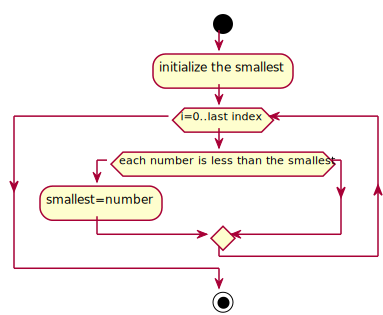

In [9]:
%%plantuml
@startuml
start
:initialize the smallest;
while(i=0..last index)
if (each number is less than the smallest)
:smallest=number;
endif
endwhile
stop
@enduml

In [8]:
x=[5,4,2,6,3]
smallest=9999
for i in x:
    print "comparing the smallest:{0} with element:{1}".format(smallest,i)
    if i<smallest:
        print "\treplacing the smallest:{0} by {1}".format(smallest,i)
        smallest=i
print "Found the smallest: ",smallest

comparing the smallest:9999 with element:5
	replacing the smallest:9999 by 5
comparing the smallest:5 with element:4
	replacing the smallest:5 by 4
comparing the smallest:4 with element:2
	replacing the smallest:4 by 2
comparing the smallest:2 with element:6
comparing the smallest:2 with element:3
Found the smallest:  2


### 초기 값 smallest의 선택

* 임의로 큰 기준 값 (앞의 예와 같이)
* member 첫 번째 값으로 -> 이 값은 반복에서 제외
* 무한대 값으로 'inf'

In [10]:
x=[5,4,2,6,3]
smallest=x[0]
#smallest='inf'
for i in x[1:]:
    print "comparing the smallest:{0} with element:{1}".format(smallest,i)
    if i<smallest:
        print "\treplacing the smallest:{0} by {1}".format(smallest,i)
        smallest=i
print "Found the smallest: ",smallest

comparing the smallest:5 with element:5
comparing the smallest:5 with element:4
	replacing the smallest:5 by 4
comparing the smallest:4 with element:2
	replacing the smallest:4 by 2
comparing the smallest:2 with element:6
comparing the smallest:2 with element:3
Found the smallest:  2


In [53]:
def find2Smallest(data):
    #s1, s2 = float('inf'), float('inf')
    s1='inf'
    s2='inf'
    for x in data:
        if x <= s1:
            print "x:{0}<=s1:{1}\t".format(x,s1),
            s1, s2 = x, s1
            print "\t",s1,s2
        elif x < s2:
            print "x:{0}<s2:{1}\t".format(x,s2),
            s2 = x
            print "\t",s1,s2
    return (s1,s2)
print find2Smallest([5,4,2,6,3])

x:5<=s1:inf		5 inf
x:4<=s1:5		4 5
x:2<=s1:4		2 4
x:3<s2:4		2 3
(2, 3)


### 학생의 풀이

* 최대값을 구하고 이를 데이터에서 제외하고 푸는 방식
* 앞의 풀이에 비해 for문을 2회 수행한다는 단점

In [1]:
def max1(data):
    max = 0
    for x in data:
        if x > max:
            max = x
    return max

def max2nd(data):
    max1st = max1(data)
    max = 0
    for x in data:
        if x > max and x != max1st:
            max = x
    return max
arr = [2,5,1,7,9]
max2nd(arr)

7

### profiling

* 알고리듬은 얼마나 빠르게 처리하는지 중요
* if문, for문 등 연산이 추가되면 속도가 당연히 느려진다.

In [3]:
%timeit findMin([5,4,2,6,3])
%prun findMin([5,4,2,6,3])

1000000 loops, best of 3: 803 ns per loop
 

In [32]:
def sum(fr,to):
    sum=0
    for i in range(fr,to+1):
        sum+=i
    return sum

def sumStupid(fr,to):
    sum=0
    for i in range(fr,to+1):
        if i%2==0:
            sum+=i
        else:
            sum+=i
    return sum
def sumStupid2(fr,to):
    sum=0
    for i in range(fr,to+1):
        if i%2==0:
            sum+=i
    for i in range(fr,to+1):
        if i%2!=0:
            sum+=i
    return sum

%timeit sum(1,100)
%timeit sum(1,1000)
%timeit sumStupid(1,100)
%timeit sumStupid2(1,100)



5050
100000 loops, best of 3: 6.48 µs per loop
10000 loops, best of 3: 59.5 µs per loop
100000 loops, best of 3: 17.7 µs per loop
10000 loops, best of 3: 28.2 µs per loop


## 알고리즘-2: Linear Search

* 번호가 적힌 공이 일렬로 세워져 있다고 가정하고, 번호를 찾는 문제
    1. 찾는 번호를 정한다
    2. 맨 왼쪽 공1과 찾는 번호를 비교한다.
    3. 다음 공2와 비교한다.
    4. 찾지 못하면 다음 공과 비교한다.
    5. 찾을 때까지 계속한다.
* 입출력
    * 입력: unordered or ordered data
    * 출력: boolean(Y/N) or index (찾는 값이 몇 번째 있는지 반환)
* index 추적
    * for문에서 몇 번째인지 추적하는 인덱스
    * enumerate를 사용하면 값과 인덱스를 추적
* 찾는 값과 일치되는 값이 없는 경우, 별도 처리 필요함.

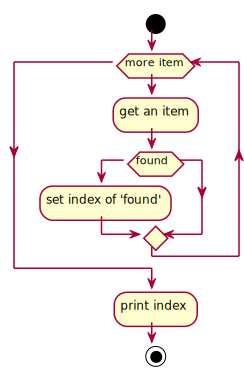

In [11]:
%%plantuml
@startuml
start
while(more item)
:get an item;
if (found)
:set index of 'found';
endif
endwhile
:print index;
stop
@enduml

In [5]:
# for문에 list그대로 사용하면서 index 추적.
toSearch=4
i=0
for x in [5,4,2,6,3]:
    if toSearch==x:
        print x,toSearch,i
        index=i
    i+=1
print index

4 4 1
1


In [7]:
# for문에 list길이를 사용하면서 index 추적필요 없슴.
numbers=[5,4,2,6,3]
toSearch=4
for i in range(len(numbers)):
    if toSearch == numbers[i]:
        print numbers[i],toSearch,i
        index=i
print index

4 4 1
1


In [ ]:
# for문에 list를 그대로 사용하지만, enumerate를 사용하면서 index 추적필요 없슴.
numbers=[5,4,2,6,3]
toSearch=4
for i, item in enumerate(numbers):
    if toSearch == item:
        print item,toSearch,i
        index=i
print index

In [65]:
# 함수로 만들기.
def linearSearch(toSearch,numbers):
    for i, item in enumerate(numbers):
        if toSearch == item:
            #print item,toSearch,i
            index=i
    return index

print linearSearch(4,numbers)

1


### 찾기 오류일 경우 어떻게 처리

* 오류처리는 반드시 필요
* 일반적으로 try-except를 사용

In [66]:
# 없는 숫자를 찾는 경우에는 오류. 무엇을 고쳐야 하나???
print linearSearch(7,numbers)

UnboundLocalError: local variable 'index' referenced before assignment

In [56]:
# 존재하지 않는 값을 찾는 경우, 에러 처리가 쉽지 않음.
# 그 이유는, 인덱스는 -1도 가능할 뿐만 아니라, 어떤 숫자 이건 가능.
# 여기서는 try-except 사용
try:
    linearSearch(7,numbers)
except Exception as e:
    print e

local variable 'index' referenced before assignment


In [63]:
# index를 -1로 초기화해서 -1이면 에러 출력
def linearSearch(toSearch,numbers):
    index=-1
    for i, item in enumerate(numbers):
        if toSearch == item:
            #print item,toSearch,i
            index=i
    return index
#res=linearSearch(4,numbers)
res=linearSearch(7,numbers)
if res==-1:
    print "error"
else:
    print "found",res

error


### 성능

* 임의로 일정 횟수를 실행한 후, 평균적으로 실행에 소요된 시간을 측정

In [24]:
%timeit linearSearch(4,numbers)

4 4 1
1
1
1000000 loops, best of 3: 1.08 µs per loop


## 알고리즘-3: binary search

* 업다운 게임
    1. 시작, 끝을 정함.
    2. 시작, 끝의 중간을 정함.
    3. 중간이 찾는 값이면 종료.
    4. 중간이 찾는 값보다 크면, 중간에서 하나 밑을 끝으로 함.
    5. 중간이 찾는 값보다 적으면, 중간에서 하나 위를 시작으로 함.
    6. 순서1로 가서 못찾거나 high>=low이면 반복함.
* 입출력
    * 입력: ordered data (데이터가 정렬되어 있지 않으면, 무의미)
    * 출력: boolean(Y/N) 또는 index
* 주의:
    * 인덱스 값을 찾으면 종료하도록 조건에 반영하지 않으면, 무한반복.
    * $log_2^N$ (데이터 수가 8개이면, $2^3$이므로 3회 내에 맞춤) 
    * myrecursive.py binary_search

### while문과 무한반복의 주의

* 종료조건
    * high < low 
    * index를 찾은 경우

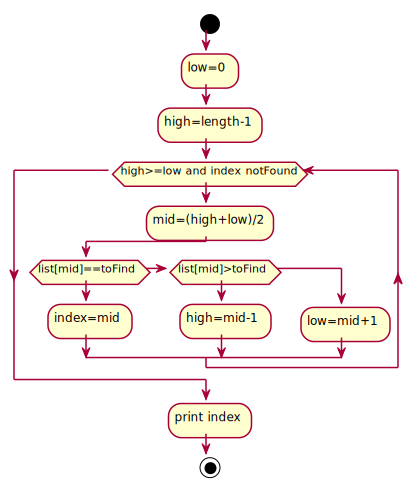

In [13]:
%%plantuml
@startuml
start
:low=0;
:high=length-1;
while(high>=low and index notFound)
:mid=(high+low)/2;
if (list[mid]==toFind)
:index=mid;
elseif (list[mid]>toFind)
:high=mid-1;
else
:low=mid+1;
endif
endwhile
:print index;
stop
@enduml

In [12]:
# 데이터 정렬 sort 라이브러리를 사용할 수 있다.
#items=[x for x in raw_input().split(',')]
items=['aa',11,'ee',44,55,'ff','bb',22,'cc',33]
# sort()한 후 별도로 저장할 필요 없슴.
items.sort()
print items
#print ','.join(items)

[11, 22, 33, 44, 55, 'aa', 'bb', 'cc', 'ee', 'ff']


In [1]:
import math
def binarySearch(data, toFind):
    low = 0
    high = len(data)-1
    index = -1
    #high=4 low=0일 경우, mid=2이면 조건이 끝나지 않음.
    #index값이 정해진 경우 while을 끝내도록 함.
    while high>=low and index==-1:
        #mid = int(math.floor((high+low)/2.0))
        mid=int((high+low)/2)
        if data[mid]==toFind:
            index = mid
            print "A: high={} mid={} low={} idx={}".format(high,mid,low,index)
        elif data[mid]>toFind:
            high = mid-1
            print "B: high={} mid={} low={} idx={}".format(high,mid,low,index)
        else:
            low = mid+1
            print "C: high={} mid={} low={} idx={}".format(high,mid,low,index)
    return index

data=[2,4,5,6,3]
data.sort()
print binarySearch(data,4)
print binarySearch(data,7)

A: high=4 mid=2 low=0 idx=2
2
C: high=4 mid=2 low=3 idx=-1
C: high=4 mid=3 low=4 idx=-1
C: high=4 mid=4 low=5 idx=-1
-1


### 무작위 수의 생성

* 무작위 수는 통계의 기본개념.
    * 1~100에서 수 하나를 고를 경우, 그 확률이 1/100이면 무작위라고 함.
    * 처음 몇 번은 1/100이 아닐 수 있으나, 충분히 여러 번 하면 1/100로 접근
* 무작위 수 0~100까지(randint(0,100) 100개 생성
* 생성된 무작위 수가 중복될 수 있으므로, 중복없는 값만을 골라(set) 정렬(set)
* 값이 정렬된 배열로 만들어, binarySearch

In [1]:
#set vs list
for i in {5,4,2,6,3}:
    print i,
print
for i in [5,4,2,6,3]:
    print i,

2 3 4 5 6
5 4 2 6 3


In [2]:
import random
data=list()
for i in range(100):
    n=random.randint(0,100)
    data.append(n)
print data
print len(data)
data=list(set(data))
print "sorted with unique values",data

[93, 31, 35, 99, 30, 64, 50, 0, 68, 30, 31, 66, 72, 16, 96, 81, 41, 78, 99, 55, 94, 22, 79, 81, 24, 80, 8, 81, 50, 27, 4, 71, 35, 2, 7, 94, 74, 51, 43, 66, 11, 70, 82, 34, 30, 45, 1, 58, 88, 94, 77, 47, 39, 75, 30, 73, 69, 42, 26, 59, 62, 62, 50, 91, 100, 90, 36, 55, 59, 58, 56, 97, 88, 10, 81, 23, 91, 35, 78, 14, 39, 35, 50, 96, 73, 81, 18, 86, 63, 8, 60, 74, 43, 19, 4, 60, 28, 39, 70, 18]
100
sorted with unique values [0, 1, 2, 4, 7, 8, 10, 11, 14, 16, 18, 19, 22, 23, 24, 26, 27, 28, 30, 31, 34, 35, 36, 39, 41, 42, 43, 45, 47, 50, 51, 55, 56, 58, 59, 60, 62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 86, 88, 90, 91, 93, 94, 96, 97, 99, 100]


In [3]:
binarySearch(data,4)

B: high=30 mid=31 low=0 idx=-1
B: high=14 mid=15 low=0 idx=-1
B: high=6 mid=7 low=0 idx=-1
A: high=6 mid=3 low=0 idx=3


3

### 학생의 프로그래밍

* 아래 프로그램의 주의 2개
    * index를 정의하지 않고 사용
        * 없는 변수index에 middle값을 줌 (7째 줄)
        * 앞 셀에서 사용한 변수를 완전히 삭제하고 하면 오류
    * break는 흐름을 jump하게 만드니까!
* break의 수정
    * break를 사용하지 않을 경우 무한반복은 index 값이 정해져도, 조건이 true이므로 무한반복
    * 예: high=4 low=0일 경우, 첫번째 if문에서 mid=2로 정해짐.
    * 그래도 조건은 '참'이고, 무한반복.
    * 조건에 mid를 찾은 경우, 즉 index값이 정해진 경우에는 while을 끝내도록 함.
* 이를 수정하면?

In [70]:
del index

In [71]:
low=0
high=len(data)-1
key=4
while(low<high):
    middle=(low+high)/2
    if (key==data[middle]):
        index=middle
        break
    elif (data[middle]>key):
        high=middle-1
    else:
        low=middle+1
print index

NameError: name 'index' is not defined

In [67]:
index=-1
low=0
high=len(data)-1
key=4
while(low<high) and index==-1:
    middle=(low+high)/2
    if (key==data[middle]):
        index=middle
        #break
    elif (data[middle]>key):
        high=middle-1
    else:
        low=middle+1
print index

-1
2


### 성능비교

* 함수에 프린트 문을 제외하고 실행

In [4]:
def binarySearch(data, toFind):
    low = 0
    high = len(data)-1
    index = -1
    #high=4 low=0일 경우, mid=2이면 조건이 끝나지 않음.
    #index값이 정해진 경우 while을 끝내도록 함.
    while high>=low and index==-1:
        #mid = int(math.floor((high+low)/2.0))
        mid=int((high+low)/2)
        if data[mid]==toFind:
            index = mid
            #print "A: high={} mid={} low={} idx={}".format(high,mid,low,index)
        elif data[mid]>toFind:
            high = mid-1
            #print "B: high={} mid={} low={} idx={}".format(high,mid,low,index)
        else:
            low = mid+1
            #print "C: high={} mid={} low={} idx={}".format(high,mid,low,index)
    return index

In [6]:
%timeit binarySearch(data,7)

The slowest run took 5.97 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.23 µs per loop


## 문제 3-4: selection sort

* 번호가 적힌 공이 일렬로 세워져 있다고 가정하고, 순서대로 정렬하는 문제
* '정렬되어 있는 그룹'과 '정렬되어 있지 않은 그룹'으로 구분.
    1. 공1번을 선택
    2. 오른쪽으로 진행하면서 공2번과 비교해서 순서가 올바르지 않으면 순서를 바꿈.
    3. 이를 끝까지 계속함. (왼쪽은 정렬, 오른쪽은 비정렬)
    4. 다음 공2번을 선택하고 순서1로 가서 반복함.
    5. 더 이상 순서를 바꿀 필요가 없을 때까지 계속 (즉, 비정렬그룹에 공이 남아있지 않을 때까지)
* 입출력
    * 입력: unordered data
    * 출력: ordered data
* 주의:
    * 하나씩 오른쪽으로 비교. 왼쪽은 정렬, 오른쪽은 비정렬.
    * 데이터 교환이 파이썬 방식
    ```
    a,b=b,a
    ```

* insertion sort와 반대.

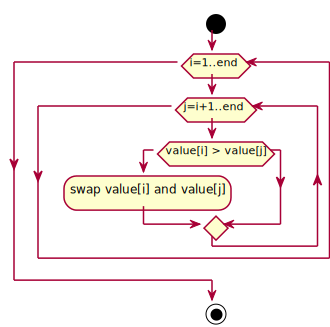

In [14]:
%%plantuml
@startuml
start
while(i=1..end)
while(j=i+1..end)
if (value[i] > value[j])
:swap value[i] and value[j];
endif
endwhile
endwhile
stop
@enduml

In [15]:
x=[5,4,2,6,3]
print "before sorting",x
xlen=len(x)
for i in range(0,xlen):
    print "for {}".format(i)
    for j in range(i+1,xlen):
        print "\tfor {}".format(j)
        if x[i] > x[j]:
            print "\t\tswapping {} {} data:{} ->".format(x[i],x[j],x),
            temp=x[i]
            x[i]=x[j]
            x[j]=temp
            print "{0}".format(x)
print "after sorting",x

before sorting [5, 4, 2, 6, 3]
for 0
	for 1
		swapping 5 4 data:[5, 4, 2, 6, 3] -> [4, 5, 2, 6, 3]
	for 2
		swapping 4 2 data:[4, 5, 2, 6, 3] -> [2, 5, 4, 6, 3]
	for 3
	for 4
for 1
	for 2
		swapping 5 4 data:[2, 5, 4, 6, 3] -> [2, 4, 5, 6, 3]
	for 3
	for 4
		swapping 4 3 data:[2, 4, 5, 6, 3] -> [2, 3, 5, 6, 4]
for 2
	for 3
	for 4
		swapping 5 4 data:[2, 3, 5, 6, 4] -> [2, 3, 4, 6, 5]
for 3
	for 4
		swapping 6 5 data:[2, 3, 4, 6, 5] -> [2, 3, 4, 5, 6]
for 4
after sorting [2, 3, 4, 5, 6]


### swap의 문제

* 함수 내의 값 변경은 지역의 문제
* 배열은 지역에서 변경하면 그 밖에도 영향을 미친다??
* 결과는 정렬이 되지 않음.

In [29]:
def swap(x,y):
    temp=x
    x=y
    y=temp
def selectionSort(x):
    xlen=len(x)
    for i in range(0,xlen):
        print "for {}".format(i)
        for j in range(i+1,xlen):
            print "\tfor {0}".format(j)
            if x[i] > x[j]:
                print "\t\tswapping {} <-> {} \tdata:{} ->".format(x[i],x[j],x),
                swap(x[i],x[j])
                print "{}".format(x)
    return x
data=[5,4,2,6,3]
print selectionSort(data)

for 0
	for 1
		swapping 5 <-> 4 	data:[5, 4, 2, 6, 3] -> [5, 4, 2, 6, 3]
	for 2
		swapping 5 <-> 2 	data:[5, 4, 2, 6, 3] -> [5, 4, 2, 6, 3]
	for 3
	for 4
		swapping 5 <-> 3 	data:[5, 4, 2, 6, 3] -> [5, 4, 2, 6, 3]
for 1
	for 2
		swapping 4 <-> 2 	data:[5, 4, 2, 6, 3] -> [5, 4, 2, 6, 3]
	for 3
	for 4
		swapping 4 <-> 3 	data:[5, 4, 2, 6, 3] -> [5, 4, 2, 6, 3]
for 2
	for 3
	for 4
for 3
	for 4
		swapping 6 <-> 3 	data:[5, 4, 2, 6, 3] -> [5, 4, 2, 6, 3]
for 4
[5, 4, 2, 6, 3]


### swap함수를 교체하고 실행

In [25]:
def swap(aList,i,j):
    temp=aList[i]
    aList[i]=aList[j]
    aList[j]=temp
def selectionSort(x):
    xlen=len(x)
    for i in range(0,xlen):
        print "for {}".format(i)
        for j in range(i+1,xlen):
            print "\tfor {0}".format(j)
            if x[i] > x[j]:
                print "\t\tswapping {} <-> {} \tdata:{} ->".format(x[i],x[j],x),
                swap(x,i,j)
                print "{}".format(x)
    return x
data=[5,4,2,6,3]
sortedList=selectionSort(data)
print "answer:",sortedList

for 0
	for 1
		swapping 5 <-> 4 	data:[5, 4, 2, 6, 3] -> [4, 5, 2, 6, 3]
	for 2
		swapping 4 <-> 2 	data:[4, 5, 2, 6, 3] -> [2, 5, 4, 6, 3]
	for 3
	for 4
for 1
	for 2
		swapping 5 <-> 4 	data:[2, 5, 4, 6, 3] -> [2, 4, 5, 6, 3]
	for 3
	for 4
		swapping 4 <-> 3 	data:[2, 4, 5, 6, 3] -> [2, 3, 5, 6, 4]
for 2
	for 3
	for 4
		swapping 5 <-> 4 	data:[2, 3, 5, 6, 4] -> [2, 3, 4, 6, 5]
for 3
	for 4
		swapping 6 <-> 5 	data:[2, 3, 4, 6, 5] -> [2, 3, 4, 5, 6]
for 4
answer: [2, 3, 4, 5, 6]


## 알고리즘-5: insertion sort

* see wiki (for graphical flowchart)
* 번호가 적힌 공이 일렬로 세워져 있다고 가정하고, 순서대로 정렬하는 문제
* '정렬되어 있는 그룹'과 '정렬되어 있지 않은 그룹'으로 구분.
    1. 공2번을 선택
    2. 왼쪽으로 진행하면서 공1번과 비교해서 순서가 올바르지 않으면 순서를 바꿈.
    3. 이를 끝까지 계속함. (왼쪽은 정렬, 오른쪽은 비정렬)
    4. 다음 공3번을 선택하고 순서1로 가서 반복함.
    5. 더 이상 순서를 바꿀 필요가 없을 때까지 계속 (즉, 비정렬그룹에 공이 남아있지 않을 때까지)
* 입출력
    * 입력: unordered data
    * 출력: ordered data
* 주의:
    * 정렬할 공은 하나씩 오른쪽으로, 비교는 하나씩 왼쪽으로. 왼쪽은 정렬, 오른쪽은 비정렬.
    * 데이터 교환이 파이썬 방식
    ```
    a,b=b,a
    ```

* 비정렬그룹에서 정렬된 그룹에 순서를 정해서 넣는다고 해서, insertion sort.

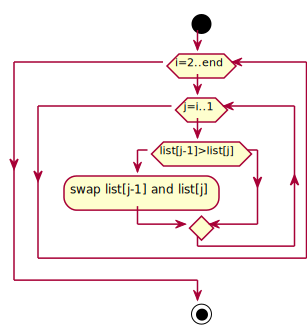

In [16]:
%%plantuml
@startuml
start
while(i=2..end)
while(j=i..1)
if (list[j-1]>list[j])
:swap list[j-1] and list[j];
endif
endwhile
endwhile
stop
@enduml

In [23]:
def insertionSort1(data):
    for i in range(1, len(data)):
        print "for {}".format(i)
        for j in range(i,0,-1):
            print "\tfor {}".format(j)
            if data[j-1] > data[j]:
                print "\t\tswapping {} <-> {}\tdata{} ->".format(data[j],data[j-1],data),
                data[j-1], data[j] = data[j], data[j-1]
                print "{}".format(data)
    return data
x=[5,4,2,6,3]
print insertionSort1(x)

for 1
	for 1
		swapping 4 <-> 5	data[5, 4, 2, 6, 3] -> [4, 5, 2, 6, 3]
for 2
	for 2
		swapping 2 <-> 5	data[4, 5, 2, 6, 3] -> [4, 2, 5, 6, 3]
	for 1
		swapping 2 <-> 4	data[4, 2, 5, 6, 3] -> [2, 4, 5, 6, 3]
for 3
	for 3
	for 2
	for 1
for 4
	for 4
		swapping 3 <-> 6	data[2, 4, 5, 6, 3] -> [2, 4, 5, 3, 6]
	for 3
		swapping 3 <-> 5	data[2, 4, 5, 3, 6] -> [2, 4, 3, 5, 6]
	for 2
		swapping 3 <-> 4	data[2, 4, 3, 5, 6] -> [2, 3, 4, 5, 6]
	for 1
[2, 3, 4, 5, 6]


In [24]:
def insertionSort2(data):
    for i in range(1, len(data)):
        print "for {}".format(i)
        j = i
        while j > 0 and data[j] < data[j-1]:
            print "\tswapping {} <-> {}\tdata{} ->".format(data[j],data[j-1],data),
            data[j], data[j-1] = data[j-1], data[j]
            print "{}".format(data)
            j -= 1
    return data
x=[5,4,2,6,3]
print insertionSort2(x)

for 1
	swapping 4 <-> 5	data[5, 4, 2, 6, 3] -> [4, 5, 2, 6, 3]
for 2
	swapping 2 <-> 5	data[4, 5, 2, 6, 3] -> [4, 2, 5, 6, 3]
	swapping 2 <-> 4	data[4, 2, 5, 6, 3] -> [2, 4, 5, 6, 3]
for 3
for 4
	swapping 3 <-> 6	data[2, 4, 5, 6, 3] -> [2, 4, 5, 3, 6]
	swapping 3 <-> 5	data[2, 4, 5, 3, 6] -> [2, 4, 3, 5, 6]
	swapping 3 <-> 4	data[2, 4, 3, 5, 6] -> [2, 3, 4, 5, 6]
[2, 3, 4, 5, 6]


## 알고리즘-6: bubble sort

* 번호가 적힌 공이 일렬로 세워져 있다고 가정하고, 순서대로 정렬하는 문제
    1. 맨 왼쪽에 있는 공부터 시작해서,
    2. 맨 왼쪽 공1번과 공2번을 비교해서 순서가 올바르지 않으면 순서를 바꿈.
    3. 공2번과 공3번을 비교해서 순서가 올바르지 않으면 순서를 바꿈.
    4. 이를 끝까지 계속함 (맨 오른쪽은 할 필요 없슴 - 그 다음 공이 없기 때문에)
    5. 순서1로 가서 반복함.
    6. 더 이상 순서를 바꿀 필요가 없을 때까지 계속
* 입출력
    * 입력: unordered data
    * 출력: ordered data
* 주의:
    * 매 반복마다, 제일 큰(무거운) 번호가 맨 오른쪽으로 이동하기 때문에, 하나씩 반복을 생략함.
    * 데이터 교환이 파이썬 방식
    ```
    a,b=b,a
    ```

* 무거운 것이 아래로 가고, 가벼운 것이 위로 가는 비유를 해서 bubble sort.


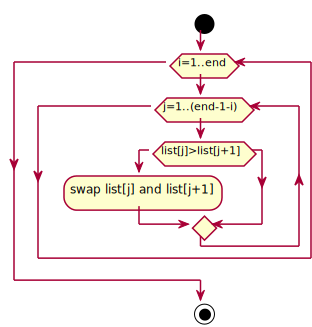

In [17]:
%%plantuml
@startuml
start
while(i=1..end)
while(j=1..(end-1-i))
if (list[j]>list[j+1])
:swap list[j] and list[j+1];
endif
endwhile
endwhile
stop
@enduml

In [7]:
def bubbleSort(data):
    for i in range(len(data)):
        print "for {}".format(i)
        for j in range(len(data)-1-i):
            print "\tfor {}".format(j)
            if data[j] > data[j+1]:
                print "\t\tswapping {} <-> {}\tdata{} ->".format(data[j],data[j+1],data),
                data[j], data[j+1] = data[j+1], data[j]
                print "{}".format(data)
    return data
x=[5,4,2,6,3]
print bubbleSort(x)

for 0
	for 0
		swapping 5 <-> 4	data[5, 4, 2, 6, 3] -> [4, 5, 2, 6, 3]
	for 1
		swapping 5 <-> 2	data[4, 5, 2, 6, 3] -> [4, 2, 5, 6, 3]
	for 2
	for 3
		swapping 6 <-> 3	data[4, 2, 5, 6, 3] -> [4, 2, 5, 3, 6]
for 1
	for 0
		swapping 4 <-> 2	data[4, 2, 5, 3, 6] -> [2, 4, 5, 3, 6]
	for 1
	for 2
		swapping 5 <-> 3	data[2, 4, 5, 3, 6] -> [2, 4, 3, 5, 6]
for 2
	for 0
	for 1
		swapping 4 <-> 3	data[2, 4, 3, 5, 6] -> [2, 3, 4, 5, 6]
for 3
	for 0
for 4
[2, 3, 4, 5, 6]


In [16]:
x=[5,4,2,6,3]
print x
x.pop(4)
print x

[5, 4, 2, 6, 3]
[5, 4, 2, 6]


## recursive

자신을 이용해 자신을 정의하는 것
Recursion means “defining something in terms of itself”

In [5]:
# Level 2
# recursive
# answer: 
def fact(x):
    if x==0:
        return 1
    print "\t{} ".format(x)
    return x*fact(x-1)

print fact(5)

	5 
	4 
	3 
	2 
	1 
if x 0
120


In [13]:
def sum(x):
    if x==0:
        return 0
    return x+sum(x-1)
print sum(100)

5050


In [10]:
def fact(x):
    fact=1
    for i in range(1,x+1):
        fact*=i
    return fact
print fact(5)

120


## merge sort

* Merge sort works by subdividing the the list into two sub-lists, sorting them using Merge sort and then merging them back up. As the recursive call is made to subdivide each list into a sublist, they will eventually reach the size of 1, which is technically a sorted list.

In [ ]:
#1~10에서의 무작위 수 생성
import random
print int(random.random()*10)

In [12]:
#import random

#random_items = [random.randint(-50, 100) for c in range(32)]

x=[5,4,2,6,3]
def merge_sort(items):
    """ Implementation of mergesort """
    if len(items) > 1:
        mid = len(items) / 2        # Determine the midpoint and split
        left = items[0:mid]
        right = items[mid:]
        merge_sort(left)            # Sort left list in-place
        merge_sort(right)           # Sort right list in-place
        l, r = 0, 0
        for i in range(len(items)):     # Merging the left and right list

            lval = left[l] if l < len(left) else None
            rval = right[r] if r < len(right) else None

            if (lval and rval and lval < rval) or rval is None:
                items[i] = lval
                l += 1
            elif (lval and rval and lval >= rval) or lval is None:
                items[i] = rval
                r += 1
            else:
                raise Exception('Could not merge, sub arrays sizes do not match the main array')
    return items
print merge_sort(x)

[2, 3, 4, 5, 6]


## 앍고리즘-7: sine, cos 그리기


In [ ]:
import math
import turtle

window=turtle.Screen()
mySin=turtle.Turtle()
myCos=turtle.Turtle()

sinList=[]
cosList=[]
amp=100

for x in range(0,1000,10):
   sinList.append((x/10,amp*math.sin(math.radians(x))))
   cosList.append((x/10,amp*math.cos(math.radians(x))))

for x in range(0,len(sinList)):
   myCos.setpos(cosList[x][0],cosList[x][1])
   mySin.setpos(sinList[x][0],sinList[x][1])


## 알고리즘-8: sierpinski

In [ ]:
import turtle
def draw_sierpinski(length,depth):
    if depth==0:
        for i in range(0,3):
            t.fd(length)
            t.left(120)
    else:
        draw_sierpinski(length/2,depth-1)
        t.fd(length/2)
        draw_sierpinski(length/2,depth-1)
        t.bk(length/2)
        t.left(60)
        t.fd(length/2)
        t.right(60)
        draw_sierpinski(length/2,depth-1)


window = turtle.Screen()
t = turtle.Turtle()
draw_sierpinski(500,1)
window.exitonclick()

## 알고리즘-9: algorithmic 삼각형

In [ ]:

# triangle
from turtle import color, begin_fill, forward, left, end_fill, done
from math import acos, degrees

def triangle_exists(a, b, c):
    """Return True iff there exists a triangle with sides a, b, c."""
    return a + b > c and b + c > a and c + a > b

def triangle_angle(a, b, c):
    """Return the angle (in degrees) opposite the side of length a in the
    triangle with sides a, b, c."""
    # See http://en.wikipedia.org/wiki/Law_of_cosines
    return degrees(acos((b ** 2 + c ** 2 - a ** 2) / (2.0 * b * c)))

def draw_triangle(a, b, c):
    """Draw a triangle with sides of lengths a, b, and c."""
    assert(triangle_exists(a, b, c))
    color('black', 'yellow')
    begin_fill()
    forward(c)
    left(180 - triangle_angle(b, c, a))
    forward(a)
    left(180 - triangle_angle(c, a, b))
    forward(b)
    end_fill()
    done()

draw_triangle(400, 350, 200)